In [1]:
%matplotlib inline
import json
import numpy as np
import plotly.graph_objects as go
import cv2
from plotly.subplots import make_subplots
from IPython.display import Image

# Load data first

multiplayer_countries_map = json.load(open('../02_listing/countries_map'))
singleplayer_pre_mapping_countries_map = json.load(open('../03_mapping/pre_mapping_countries_map'))
image_to_country_map = json.load(open('../04_data_cleaning/image_to_country_map'))
variance_map = json.load(open('../04_data_cleaning/variance_map'))

# Combine image_to_country_map and variance_map (they have the same keys, but different kinds of values)
# into a single dictionary, where the values are tuples of the form (country, variance)
image_to_country_variance_map = {}
for key in image_to_country_map:
    image_to_country_variance_map[key] = (image_to_country_map[key], variance_map[key])
    
# Combine the two countries maps into a single dictionary, where the values are tuples of the form (multiplayer_country, singleplayer_country)
countries_map = {}
for key in set([*multiplayer_countries_map.keys(), *singleplayer_pre_mapping_countries_map.keys()]):
    countries_map[key] = (multiplayer_countries_map.get(key, np.nan), singleplayer_pre_mapping_countries_map.get(key, np.nan))
    
# Print number of singleplayer games and number of multiplayer games by summing all the values in the countries_map
singleplayer_games = sum(singleplayer_pre_mapping_countries_map.values())
multiplayer_games = sum(multiplayer_countries_map.values())

# Display in a fancy plotly plot (not a table but a bar chart with nice big labels of the final values
fig = go.Figure(data=[
    go.Bar(name='Singleplayer', x=['Singleplayer'], y=[singleplayer_games], text=[singleplayer_games], textposition='auto'),
    go.Bar(name='Multiplayer', x=['Multiplayer'], y=[multiplayer_games], text=[multiplayer_games], textposition='auto')
])

# Display the plot
fig.show()

In [2]:
# Display the multiplayer games by country
fig = go.Figure(data=[
    go.Bar(name='Multiplayer', x=[key for key in multiplayer_countries_map], y=[multiplayer_countries_map[key] for key in multiplayer_countries_map])
])
fig.show()

In [3]:
# Display the singleplayer games by country
fig = go.Figure(data=[
    go.Bar(name='Singleplayer', x=[key for key in singleplayer_pre_mapping_countries_map], y=[singleplayer_pre_mapping_countries_map[key] for key in singleplayer_pre_mapping_countries_map])
])
fig.show()

In [6]:
# Assuming image_to_country_variance_map is a dictionary with image paths and (country, variance) as values
# Initialize subplots
rows=3
cols=3
fig = make_subplots(rows=rows, cols=cols, subplot_titles=[value[0] for value in image_to_country_variance_map.values()], horizontal_spacing=0.05, vertical_spacing=0.05)

# Iterate over each image and its associated data
for idx, (image_path, (country, variance)) in enumerate(image_to_country_variance_map.items()):
    # Load and process the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate position in the grid
    row = idx // rows + 1
    col = idx % cols + 1
    
    if row > rows or col > cols:
      break

    # Add the image to the subplot
    fig.add_trace(
        go.Image(z=image_rgb),
        row=row, col=col
    )

# Update layout settings to maintain 16:9 aspect ratio for each subplot
fig.update_layout(
    width=1200,
    height=675,  # This maintains an aspect ratio of 16:9 for the entire figure
    margin=dict(l=50, r=50, t=50, b=50),  # Reduce the margins to increase image size
    showlegend=False
)

# Hide axis lines and ticks for each subplot
fig.update_xaxes(showline=False, showticklabels=False, zeroline=False)
fig.update_yaxes(showline=False, showticklabels=False, zeroline=False)

# Show the figure
fig.write_image("sample.png")

# Delete all plotly image vars to save disk space
del fig

# Load the image and display it
Image(filename='sample.png') 

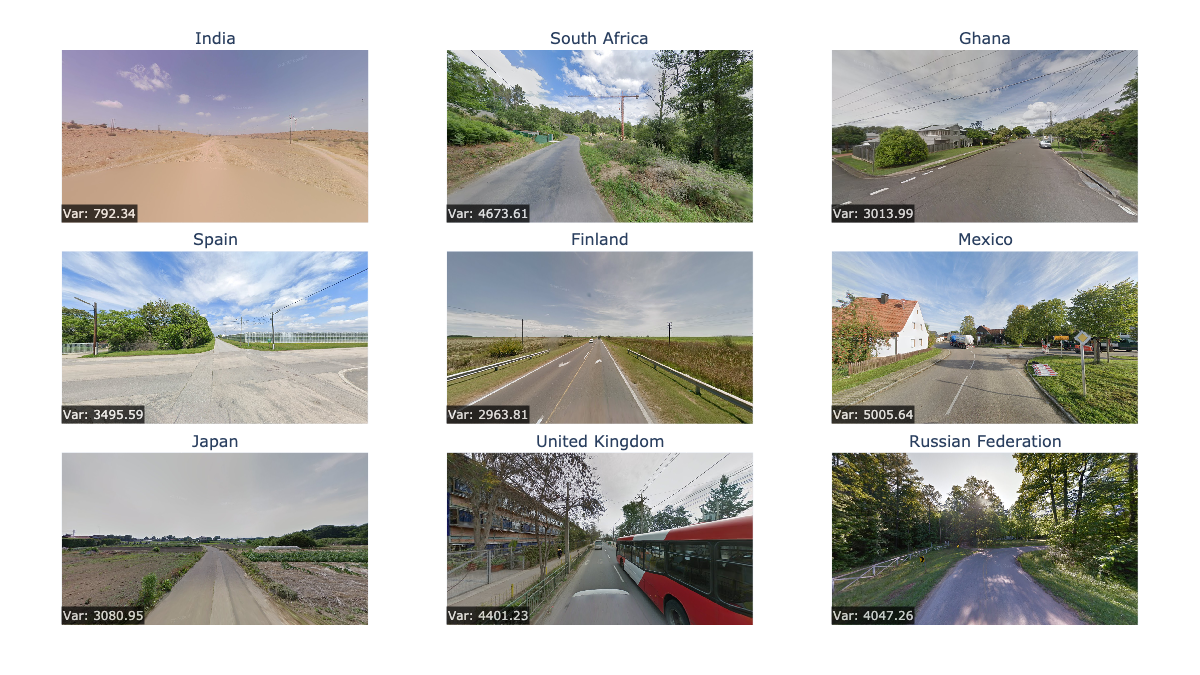

In [ ]:
# Assuming image_to_country_variance_map is a dictionary with image paths and (country, variance) as values
# Initialize subplots
rows=3
cols=3
fig = make_subplots(rows=rows, cols=cols, subplot_titles=[value[0] for value in image_to_country_variance_map.values()], horizontal_spacing=0.05, vertical_spacing=0.05)

# Iterate over each image and its associated data
for idx, (image_path, (country, variance)) in enumerate(image_to_country_variance_map.items()):
    # Load and process the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate position in the grid
    row = idx // rows + 1
    col = idx % cols + 1
    
    if row > rows or col > cols:
      break

    # Add the image to the subplot
    fig.add_trace(
        go.Image(z=image_rgb),
        row=row, col=col
    )
    
    # Adjust annotation for variance within the domain of the subplot
    fig.add_annotation(
        text=f"Var: {variance:.2f}",  # Displaying variance as a floating point number with 2 decimal places
        x=(col - 1) / cols * 1.05 + 0.01,  # Position annotation within the subplot column on the figure canvas
        y=(rows - row) / rows * 1.05,  # Position annotation within the subplot row on the figure canvas
        xref="paper",
        yref="paper",
        xanchor="left",
        yanchor="bottom",
        showarrow=False,
        font=dict(color="white", size=12),
        bgcolor="black",
        opacity=0.7
    )

# Update layout settings to maintain 16:9 aspect ratio for each subplot
fig.update_layout(
    width=1200,
    height=675,  # This maintains an aspect ratio of 16:9 for the entire figure
    margin=dict(l=50, r=50, t=50, b=50),  # Reduce the margins to increase image size
    showlegend=False
)

# Hide axis lines and ticks for each subplot
fig.update_xaxes(showline=False, showticklabels=False, zeroline=False)
fig.update_yaxes(showline=False, showticklabels=False, zeroline=False)

# Show the figure
fig.write_image("variance.png")

# Delete all plotly image vars to save disk space
del fig

# Load the image and display it
Image(filename='variance.png') 